In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("../final_table.csv")

In [27]:
non_ventilation = df[
    (df["cause_primary"] != "poor ventilation") &
    (df["cause_secondary"] != "poor ventilation")
]


In [28]:
ventilation = df[
    (df["cause_primary"] == "poor ventilation") |
    (df["cause_secondary"] == "poor ventilation")
]


In [29]:
non_ventilation

,property_type,wall_type,age,issue_type,orientation,ventilation,window_type,occupancy,drying_clothes,main_issue_location,...,cause,analysis,heating_system,property_type_categorised,ventilation_categorised,window_type_categorised,cause_primary,cause_secondary,analysis_primary,analysis_secondary
1,terraced four bedroom dwelling,solid,not mentioned,both,not mentioned,"mechanical extraction unit in kitchen, trickle...",not mentioned,not mentioned,not mentioned,dining room,...,The reported damp and mould issues are primari...,The reported damp and mould issues are primari...,Gas central heating,mid terrace,extract ventilation,not mentioned,external moisture penetration,rising damp,poor ventilation,rising damp
2,ground floor apartment in a purpose built block,solid,not mentioned,both,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,"bathroom, kitchen",...,The main causes of the reported damp and mould...,The reported damp and mould issues in the apar...,Not mentioned,flat,not mentioned,not mentioned,internal leaks/plumbing,external moisture penetration,poor ventilation,none
16,one bedroom ground floor flat,cavity,not mentioned,mould,not mentioned,"mechanical extraction unit in the kitchen, tri...",not mentioned,not mentioned,no,"lounge, bedroom",...,Insufficient ventilation during periods of ele...,The reported damp and mould issues are primari...,Not mentioned,ground floor flat,extract ventilation,not mentioned,occupant behaviour,none,poor ventilation,none
24,mid terrace brick built building,cavity,circa 1970,both,not mentioned,not mentioned,uPVC,not mentioned,not mentioned,kitchen,...,The main causes of the reported damp and mould...,The main causes of the damp and mould issues i...,Gas central heating,mid terrace,not mentioned,uPVC,external moisture penetration,none,external moisture penetration,none
28,Tudor style two-bedroom semi-detached dwelling,timber,1600s,mould,not mentioned,well ventilated,not mentioned,not mentioned,not mentioned,lounge,...,The main causes of the reported damp issues ar...,The reported damp and mould issues in the loun...,Not mentioned,semi-detached/end terrace,natural ventilation,not mentioned,external moisture penetration,none,poor ventilation,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,basement flat in a terrace town house,solid,not mentioned,both,not mentioned,sash windows and extractor unit in shower room,sash,not mentioned,not mentioned,lounge,...,The ongoing moisture issues affecting the wall...,The reported damp and mould issues in the prop...,Not mentioned,flat,extract ventilation,other,internal leaks/plumbing,residual construction moisture,poor ventilation,other/unclear
975,large end of terrace dwelling,cavity,not mentioned,damp,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,Bedroom 3,...,The significant areas of cold identified in th...,The main causes of the reported damp and mould...,Not mentioned,semi-detached/end terrace,not mentioned,not mentioned,insufficient heating,none,poor ventilation,none
983,two-bedroomed dwelling,cavity,1965,both,not mentioned,"mechanical extraction unit in bathroom, cooker...",not mentioned,not mentioned,not mentioned,"bathroom, garage",...,The reported issues are primarily caused by a ...,The reported issues of damp and mould in the p...,Gas central heating,other,continuous mechanical ventilation,not mentioned,internal leaks/plumbing,external moisture penetration,poor ventilation,residual construction moisture
988,large detached dwelling,cavity,1970s,both,not mentioned,not mentioned,not mentioned,not mentioned,not mentioned,kitchen / dining area,...,The main cause of the reported issues is a lea...,The reported damp and mould issues are primari...,Gas central heating,detached,not mentioned,not mentioned,internal leaks/plumbing,none,poor ventilation,none


In [30]:
ventilation["ventilation_categorised"].value_counts(normalize=True)

ventilation_categorised
extract ventilation                  0.719178
natural ventilation                  0.110731
continuous mechanical ventilation    0.076484
not mentioned                        0.045662
MVHR                                 0.014840
PIV                                  0.012557
other                                0.007991
poor ventilation                     0.007991
none                                 0.004566
Name: proportion, dtype: float64

In [31]:
non_ventilation["ventilation_categorised"].value_counts(normalize=True)

ventilation_categorised
not mentioned                        0.459677
extract ventilation                  0.314516
natural ventilation                  0.129032
continuous mechanical ventilation    0.064516
poor ventilation                     0.016129
other                                0.016129
Name: proportion, dtype: float64

In [32]:


pd.crosstab(df["cause_primary"], df["ventilation_categorised"], normalize="index")


ventilation_categorised,MVHR,PIV,continuous mechanical ventilation,extract ventilation,natural ventilation,none,not mentioned,other,poor ventilation
cause_primary,,,,,,,,,
external moisture penetration,0.000000,0.009174,0.064220,0.431193,0.100917,0.009174,0.348624,0.000000,0.036697
insufficient heating,0.000000,0.000000,0.071429,0.500000,0.285714,0.000000,0.142857,0.000000,0.000000
internal leaks/plumbing,0.000000,0.000000,0.043478,0.478261,0.043478,0.021739,0.347826,0.065217,0.000000
occupant behaviour,0.040816,0.000000,0.020408,0.795918,0.122449,0.000000,0.020408,0.000000,0.000000
other/unclear,0.000000,0.000000,0.000000,0.250000,0.250000,0.000000,0.500000,0.000000,0.000000
poor ventilation,0.014745,0.013405,0.084450,0.722520,0.109920,0.002681,0.037534,0.008043,0.006702
residual construction moisture,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.333333,0.000000,0.000000
rising damp,0.000000,0.000000,0.038462,0.384615,0.269231,0.000000,0.307692,0.000000,0.000000


# 1. Main Causes

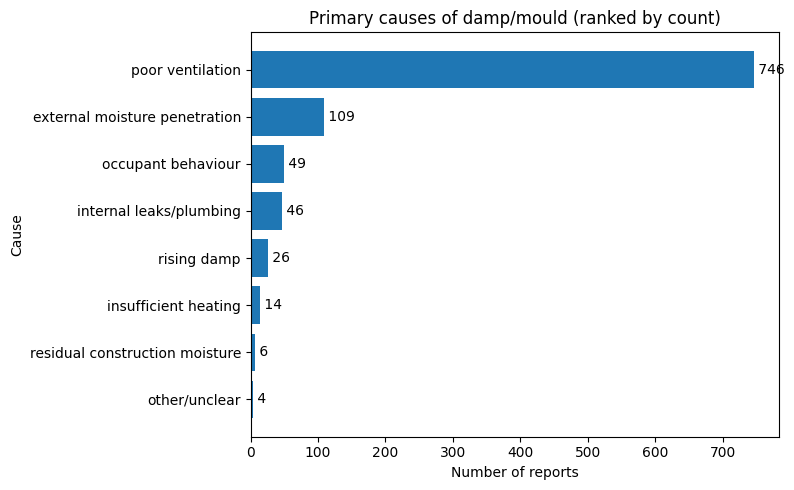

In [33]:


# Pick the column to rank
col = "cause_primary"

# Counts (sorted)
counts = df[col].value_counts().sort_values(ascending=True)

# Plot: ranked horizontal bar chart (counts)
plt.figure(figsize=(8, 5))
plt.barh(counts.index, counts.values)
plt.title("Primary causes of damp/mould (ranked by count)")
plt.xlabel("Number of reports")
plt.ylabel("Cause")
for i, v in enumerate(counts.values):
    plt.text(v, i, f" {v}", va="center")  # annotate counts
plt.tight_layout()
plt.show()


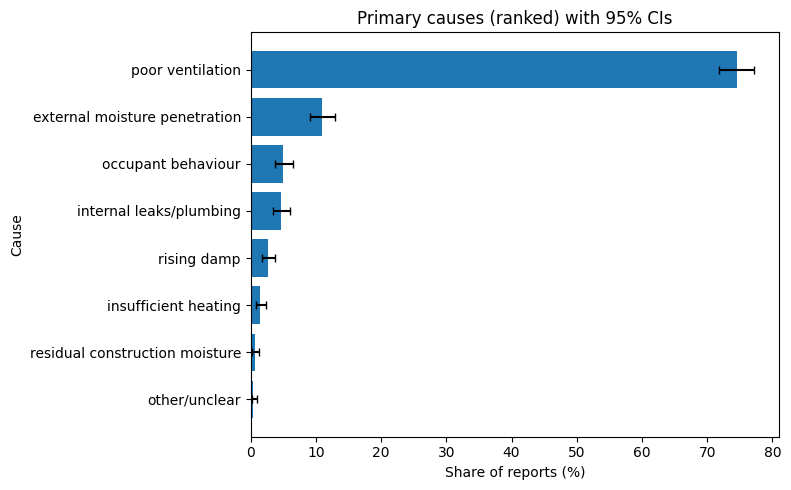

In [10]:
import numpy as np

n = len(df)

def wilson_ci(k, n, z=1.96):
    p = k / n
    z2 = z**2
    denom = 1 + z2/n
    center = (p + z2/(2*n)) / denom
    half = (z * np.sqrt((p*(1-p)/n) + (z2/(4*n**2)))) / denom
    return (center - half, center + half)

k = counts.values
centers = (k / n) * 100
ci = np.array([wilson_ci(ki, n) for ki in k]) * 100  # in %
err_lower = centers - ci[:,0]
err_upper = ci[:,1] - centers

plt.figure(figsize=(8, 5))
plt.barh(counts.index, centers, xerr=[err_lower, err_upper], capsize=3)
plt.title("Primary causes (ranked) with 95% CIs")
plt.xlabel("Share of reports (%)")
plt.ylabel("Cause")
plt.tight_layout()
plt.show()


In [11]:
# Number of reports where each cause is mentioned as either primary or secondary cause:
import pandas as pd

# Count for primary causes
primary_counts = df['cause_primary'].value_counts().rename("primary")

# Count for secondary causes
secondary_counts = df['cause_secondary'].value_counts().rename("secondary")

# Combine into one table
cause_table = pd.concat([primary_counts, secondary_counts], axis=1).fillna(0)

# Add total column
cause_table["total"] = cause_table["primary"] + cause_table["secondary"]

# Make sure counts are integers
cause_table = cause_table.astype(int)

print(cause_table)


                                primary  secondary  total
poor ventilation                    746        130    876
external moisture penetration       109        140    249
occupant behaviour                   49        203    252
internal leaks/plumbing              46         94    140
rising damp                          26         64     90
insufficient heating                 14         28     42
residual construction moisture        6         21     27
other/unclear                         4         17     21
none                                  0        303    303


# 2. Property Types

Here we see a heatmap showing the relation between the type of property and the cause of the issue.

In [12]:
print(df["property_type_categorised"].value_counts())

property_type_categorised
ground floor flat            268
semi-detached/end terrace    267
flat                         210
mid terrace                  103
other                         79
detached                      68
not mentioned                  5
Name: count, dtype: int64


In [13]:
ct = pd.crosstab(
    df["property_type_categorised"],
    df["cause_primary"],
    margins=True,  # adds row/col totals
    margins_name="Total"
)

ct_pct = (ct.div(ct.sum(axis=1), axis=0) * 100).round(1)
ct_pct["Row_Total"] = ct.sum(axis=1)  # add totals

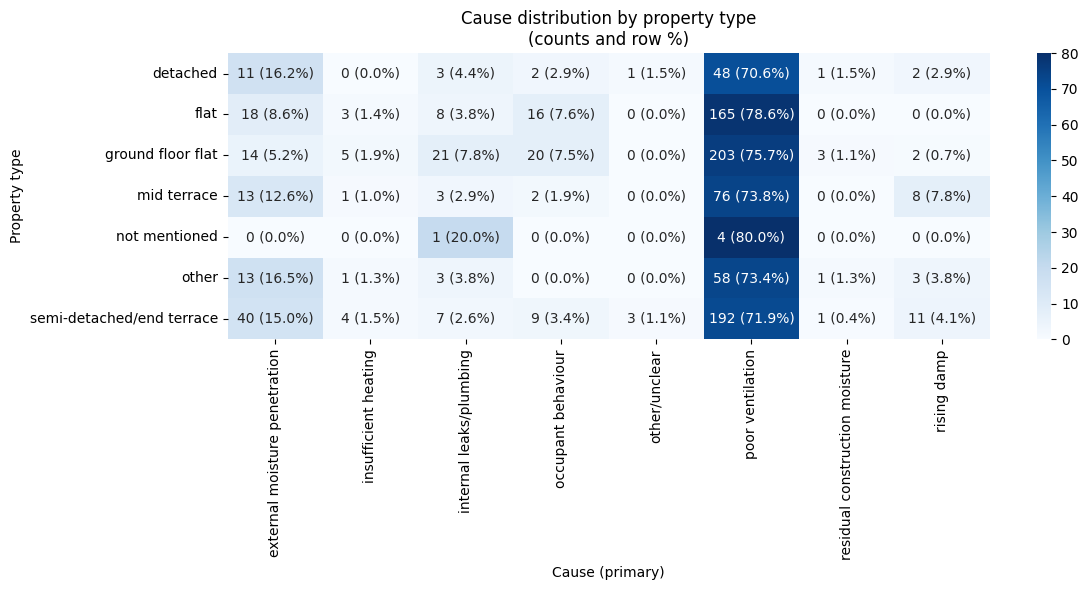

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

ct_counts = pd.crosstab(df["property_type_categorised"], df["cause_primary"])
ct_pct = (ct_counts.div(ct_counts.sum(axis=1), axis=0) * 100).round(1)

plt.figure(figsize=(12,6))
sns.heatmap(ct_pct, annot=ct_counts.astype(str) + " (" + ct_pct.astype(str) + "%)", fmt="", cmap="Blues")
plt.title("Cause distribution by property type\n(counts and row %)")
plt.ylabel("Property type")
plt.xlabel("Cause (primary)")
plt.tight_layout()
plt.show()


An example of an insight we can gain is - flats (non-ground floor) have poor ventilation being the primary cause 100% of the time (21 total)
However in semi-detached/end terrace properties this is only 74.2% (23 instances) so usually has a wider range of causes. ground floor flats only have 65% of the instances being poor ventilation.

This is just an example, need way more data to provide anything meaningful

# 3. Ventilation system effectiveness

#### Crosstab of causes and ventilation category:

In [15]:
ct = pd.crosstab(df["ventilation_categorised"], df["cause_primary"])
ct_pct = (ct.div(ct.sum(axis=1), axis=0) * 100).round(1)
display(ct_pct)


cause_primary,external moisture penetration,insufficient heating,internal leaks/plumbing,occupant behaviour,other/unclear,poor ventilation,residual construction moisture,rising damp
ventilation_categorised,,,,,,,,
MVHR,0.0,0.0,0.0,15.4,0.0,84.6,0.0,0.0
PIV,9.1,0.0,0.0,0.0,0.0,90.9,0.0,0.0
continuous mechanical ventilation,9.3,1.3,2.7,1.3,0.0,84.0,0.0,1.3
extract ventilation,7.0,1.0,3.3,5.8,0.1,80.6,0.6,1.5
natural ventilation,9.7,3.5,1.8,5.3,0.9,72.6,0.0,6.2
none,25.0,0.0,25.0,0.0,0.0,50.0,0.0,0.0
not mentioned,39.2,2.1,16.5,1.0,2.1,28.9,2.1,8.2
other,0.0,0.0,33.3,0.0,0.0,66.7,0.0,0.0
poor ventilation,44.4,0.0,0.0,0.0,0.0,55.6,0.0,0.0


In [16]:
display(ct)

cause_primary,external moisture penetration,insufficient heating,internal leaks/plumbing,occupant behaviour,other/unclear,poor ventilation,residual construction moisture,rising damp
ventilation_categorised,,,,,,,,
MVHR,0,0,0,2,0,11,0,0
PIV,1,0,0,0,0,10,0,0
continuous mechanical ventilation,7,1,2,1,0,63,0,1
extract ventilation,47,7,22,39,1,539,4,10
natural ventilation,11,4,2,6,1,82,0,7
none,1,0,1,0,0,2,0,0
not mentioned,38,2,16,1,2,28,2,8
other,0,0,3,0,0,6,0,0
poor ventilation,4,0,0,0,0,5,0,0


#### Risk of 'poor ventilation' by category type:

In [17]:
grp = df.groupby("ventilation_categorised")
n = grp.size()
k = grp["cause_primary"].apply(lambda s: (s == "poor ventilation").sum())
risk = (k / n * 100).round(1)

pd.DataFrame({"n": n, "poor_vent_count": k, "poor_vent_%": risk})


,n,poor_vent_count,poor_vent_%
ventilation_categorised,,,
MVHR,13,11,84.6
PIV,11,10,90.9
continuous mechanical ventilation,75,63,84.0
extract ventilation,669,539,80.6
natural ventilation,113,82,72.6
none,4,2,50.0
not mentioned,97,28,28.9
other,9,6,66.7
poor ventilation,9,5,55.6


#### Relative risk:

In [18]:
baseline = "natural ventilation"
rr = (risk / risk.loc[baseline]).round(2)
print(rr)


ventilation_categorised
MVHR                                 1.17
PIV                                  1.25
continuous mechanical ventilation    1.16
extract ventilation                  1.11
natural ventilation                  1.00
none                                 0.69
not mentioned                        0.40
other                                0.92
poor ventilation                     0.77
dtype: float64


# 4. Secondary contributors

In [19]:
print(df["cause_primary"].value_counts())
print("")
print(df["cause_secondary"].value_counts())

cause_primary
poor ventilation                  746
external moisture penetration     109
occupant behaviour                 49
internal leaks/plumbing            46
rising damp                        26
insufficient heating               14
residual construction moisture      6
other/unclear                       4
Name: count, dtype: int64

cause_secondary
none                              303
occupant behaviour                203
external moisture penetration     140
poor ventilation                  130
internal leaks/plumbing            94
rising damp                        64
insufficient heating               28
residual construction moisture     21
other/unclear                      17
Name: count, dtype: int64


In [20]:
pd.crosstab(df["cause_primary"], df["cause_secondary"])


cause_secondary,external moisture penetration,insufficient heating,internal leaks/plumbing,none,occupant behaviour,other/unclear,poor ventilation,residual construction moisture,rising damp
cause_primary,,,,,,,,,
external moisture penetration,0,1,16,20,5,0,50,2,15
insufficient heating,0,0,0,2,5,1,6,0,0
internal leaks/plumbing,7,1,0,11,1,1,22,2,1
occupant behaviour,3,0,2,8,0,0,35,1,0
other/unclear,0,0,0,3,0,0,0,0,1
poor ventilation,120,26,74,258,191,15,0,16,46
residual construction moisture,0,0,1,1,0,0,3,0,1
rising damp,10,0,1,0,1,0,14,0,0


In [21]:
import pandas as pd
from itertools import combinations

# list of all categories
categories = sorted(set(df["cause_primary"]) | set(df["cause_secondary"]))

# init co-occurrence table
co_matrix = pd.DataFrame(0, index=categories, columns=categories)

for _, row in df.iterrows():
    causes = {row["cause_primary"]}
    if row["cause_secondary"] != "none":
        causes.add(row["cause_secondary"])
    for a, b in combinations(causes, 2):
        co_matrix.loc[a, b] += 1
        co_matrix.loc[b, a] += 1

display(co_matrix)


,external moisture penetration,insufficient heating,internal leaks/plumbing,none,occupant behaviour,other/unclear,poor ventilation,residual construction moisture,rising damp
external moisture penetration,0,1,23,0,8,0,170,2,25
insufficient heating,1,0,1,0,5,1,32,0,0
internal leaks/plumbing,23,1,0,0,3,1,96,3,2
none,0,0,0,0,0,0,0,0,0
occupant behaviour,8,5,3,0,0,0,226,1,1
other/unclear,0,1,1,0,0,0,15,0,1
poor ventilation,170,32,96,0,226,15,0,19,60
residual construction moisture,2,0,3,0,1,0,19,0,1
rising damp,25,0,2,0,1,1,60,1,0


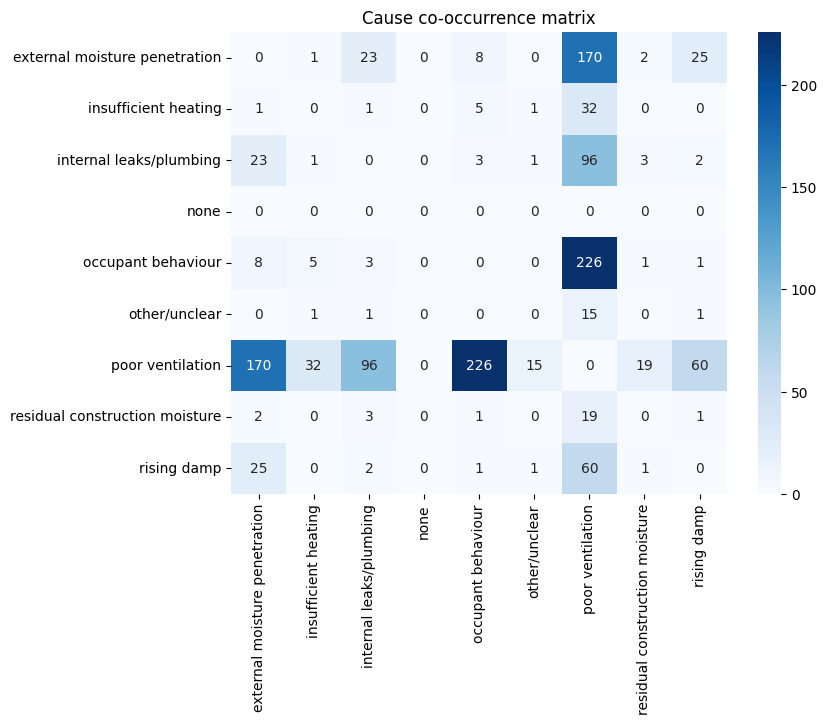

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(co_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Cause co-occurrence matrix")
plt.show()


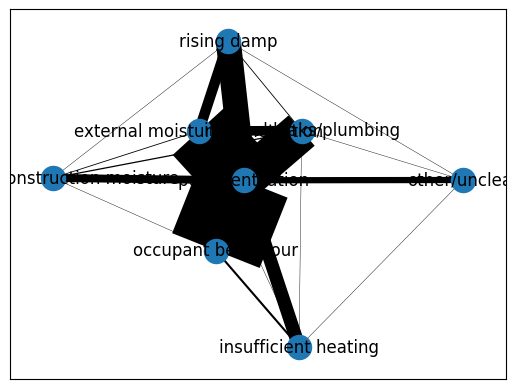

In [23]:
import networkx as nx

G = nx.Graph()
for a in categories:
    for b in categories:
        if co_matrix.loc[a, b] > 0:
            G.add_edge(a, b, weight=co_matrix.loc[a, b])

nx.draw_networkx(G, with_labels=True, width=[d['weight']*0.3 for _,_,d in G.edges(data=True)])


# 5. Window types

In [24]:
df["window_type_categorised"].value_counts()


window_type_categorised
not mentioned      542
uPVC               429
other               11
timber               9
uPVC and timber      5
aluminium            4
Name: count, dtype: int64

In [25]:
ct = pd.crosstab(df["window_type_categorised"], df["cause_primary"])
ct_pct = (ct.div(ct.sum(axis=1), axis=0) * 100).round(1)

display(ct)
display(ct_pct)


cause_primary,external moisture penetration,insufficient heating,internal leaks/plumbing,occupant behaviour,other/unclear,poor ventilation,residual construction moisture,rising damp
window_type_categorised,,,,,,,,
aluminium,0,0,0,0,0,4,0,0
not mentioned,79,9,35,27,3,370,5,14
other,2,1,1,0,0,6,0,1
timber,1,0,0,1,0,7,0,0
uPVC,27,4,10,21,1,354,1,11
uPVC and timber,0,0,0,0,0,5,0,0


cause_primary,external moisture penetration,insufficient heating,internal leaks/plumbing,occupant behaviour,other/unclear,poor ventilation,residual construction moisture,rising damp
window_type_categorised,,,,,,,,
aluminium,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
not mentioned,14.6,1.7,6.5,5.0,0.6,68.3,0.9,2.6
other,18.2,9.1,9.1,0.0,0.0,54.5,0.0,9.1
timber,11.1,0.0,0.0,11.1,0.0,77.8,0.0,0.0
uPVC,6.3,0.9,2.3,4.9,0.2,82.5,0.2,2.6
uPVC and timber,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0


In [35]:
ct = pd.crosstab(df["wall_type"], df["cause_primary"])
ct_pct = (ct.div(ct.sum(axis=1), axis=0) * 100).round(1)

display(ct)
display(ct_pct)


cause_primary,external moisture penetration,insufficient heating,internal leaks/plumbing,occupant behaviour,other/unclear,poor ventilation,residual construction moisture,rising damp
wall_type,,,,,,,,
cavity,56,12,34,42,4,547,4,12
not mentioned,6,0,0,1,0,34,0,0
solid,46,2,10,6,0,152,2,13
timber,1,0,2,0,0,13,0,1


cause_primary,external moisture penetration,insufficient heating,internal leaks/plumbing,occupant behaviour,other/unclear,poor ventilation,residual construction moisture,rising damp
wall_type,,,,,,,,
cavity,7.9,1.7,4.8,5.9,0.6,76.9,0.6,1.7
not mentioned,14.6,0.0,0.0,2.4,0.0,82.9,0.0,0.0
solid,19.9,0.9,4.3,2.6,0.0,65.8,0.9,5.6
timber,5.9,0.0,11.8,0.0,0.0,76.5,0.0,5.9
